# PROYECTO MINERÍA DE DATOS

## Datos de la población de vehículos en los últimos años

### 1. Selección de datasets y variables

#### Importaciones generales del proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Lectura del dataset y remplazo de comas

In [2]:
ds_vehiculos = pd.read_csv('C.csv')

ds_vehiculos['Price'] = ds_vehiculos['Price'].str.replace(',', '')
ds_vehiculos['Kmh'] = ds_vehiculos['Kmh'].str.replace(',', '')

ds_vehiculos

,id,Model,Year,Kmh,Color,Type,Fuel,Price
0,1,Hyundai Elantra HD,2009,165000,Gray,Automatic,Gasoline,560000
1,2,Hyundai Elantra,2010,194000,Black,Automatic,Gasoline,600000
2,3,Hyundai Elantra HD,2010,205000,Silver,Automatic,Gasoline,575000
3,4,Hyundai Elantra,2010,160000,Black,Automatic,Gasoline,550000
4,5,Hyundai Elantra,2009,140451,Eggplant,Automatic,Gasoline,650000
...,...,...,...,...,...,...,...,...
594,595,KIA Picanto,2015,70000,Silver,Automatic,Gasoline,535000
595,596,Mitsubishi Lancer EX Shark,2015,120000,Black,Automatic,Gasoline,660000
596,597,Ssang Yong Torres,2024,4000,White,Automatic,Gasoline,1900000
597,598,KIA Cerato,2011,200000,Red,Automatic,Gasoline,665000


### 2. Modelado de Datos en Esquema Estrella

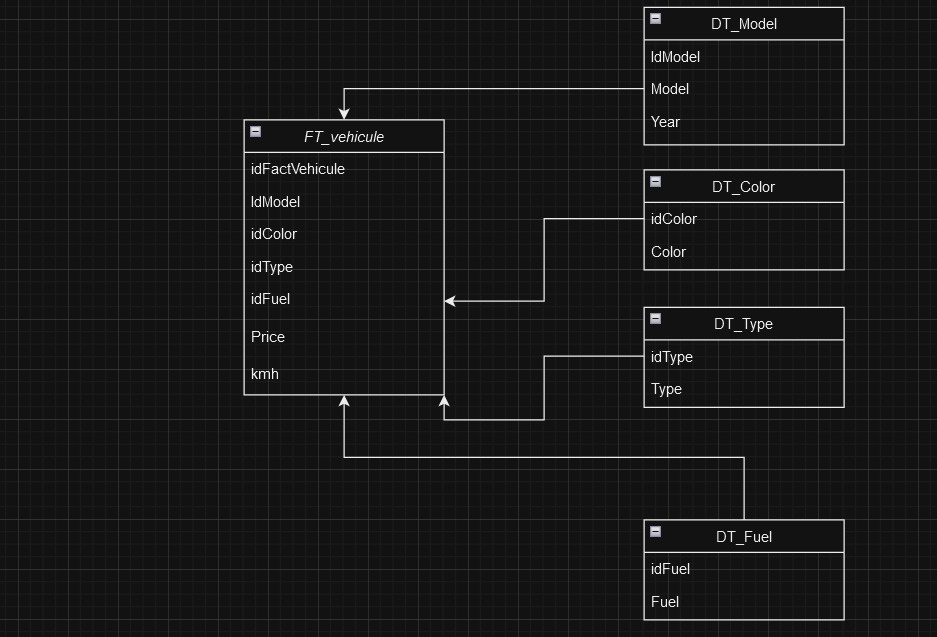

### 3. Limpieza y Transformación de Datos

#### Datos duplicados o repetidos

In [3]:
#Saber de forma general que campos estan duplicados o repetidos
ds_lista_duplicados = ds_vehiculos.duplicated()
ds_filas_duplicadas = ds_vehiculos[ds_lista_duplicados]
ds_filas_duplicadas

,id,Model,Year,Kmh,Color,Type,Fuel,Price


#### Datos NaN remplazados por 0.

In [4]:
ds_vehiculos.fillna(0, inplace= True)
ds_vehiculos

,id,Model,Year,Kmh,Color,Type,Fuel,Price
0,1,Hyundai Elantra HD,2009,165000,Gray,Automatic,Gasoline,560000
1,2,Hyundai Elantra,2010,194000,Black,Automatic,Gasoline,600000
2,3,Hyundai Elantra HD,2010,205000,Silver,Automatic,Gasoline,575000
3,4,Hyundai Elantra,2010,160000,Black,Automatic,Gasoline,550000
4,5,Hyundai Elantra,2009,140451,Eggplant,Automatic,Gasoline,650000
...,...,...,...,...,...,...,...,...
594,595,KIA Picanto,2015,70000,Silver,Automatic,Gasoline,535000
595,596,Mitsubishi Lancer EX Shark,2015,120000,Black,Automatic,Gasoline,660000
596,597,Ssang Yong Torres,2024,4000,White,Automatic,Gasoline,1900000
597,598,KIA Cerato,2011,200000,Red,Automatic,Gasoline,665000


#### Verificación y cambio de tipo de dato para "Price"

In [5]:
print(ds_vehiculos['Price'].dtypes)
ds_vehiculos['Price'] = ds_vehiculos['Price'].astype('int')
print(ds_vehiculos['Price'].dtype)

object
int64


####  Verificacion y cambio de tipos para Kmh

In [6]:
print(ds_vehiculos['Kmh'].dtypes)
ds_vehiculos['Kmh'] = ds_vehiculos['Kmh'].astype('int')
print(ds_vehiculos['Kmh'].dtype)


object
int64


### 4. Gráficos Exploratorios

### 1. Gráfica de barras: Número de vehículos por tipo de vehículo (automático o manual)

Descripción: mostrar la distribución de vehículos por tipo.

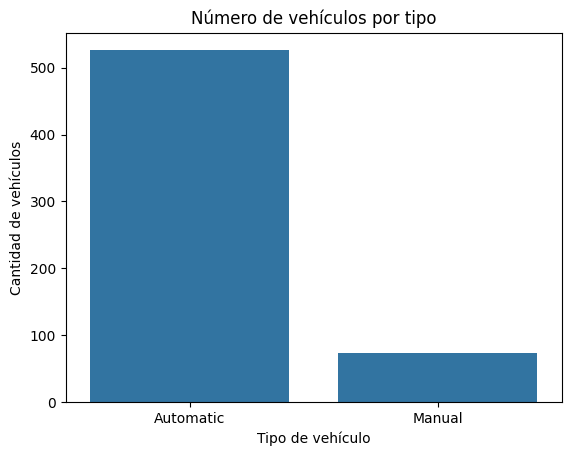

In [7]:
# Contar vehículos por tipo
vehiculo_x_tipo = ds_vehiculos['Type'].value_counts()

# Crear gráfica de barras
sns.barplot(x=vehiculo_x_tipo.index, y = vehiculo_x_tipo.values)
plt.title('Número de vehículos por tipo')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad de vehículos')
plt.show()


### 2. Gráfica de barras apiladas: Distribución de vehículos por año del modelo y tipo

Descripción: visualizar cómo han evolucionado los diferentes tipos de vehículos a lo largo de los años con esta gráfica.

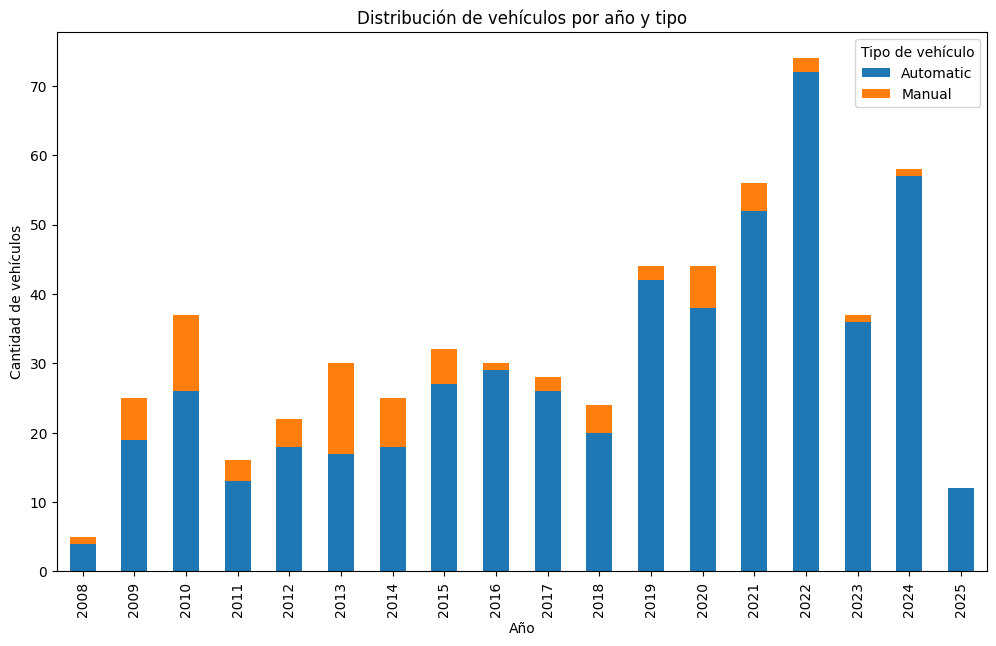

In [8]:
# Agrupar Type y Year para obtener el tamaño.
vehiculo_x_año = ds_vehiculos.groupby(['Year', 'Type']).size().unstack()

# Crear gráfica de barras apiladas
vehiculo_x_año.plot(kind='bar', stacked=True, figsize = (12, 7))
plt.title('Distribución de vehículos por año y tipo')
plt.xlabel('Año')
plt.ylabel('Cantidad de vehículos')
plt.legend(title='Tipo de vehículo')
plt.show()


### 3.  Gráfica de pastel: Porcentaje de vehículos por Modelo

Descripción: mostrar la proporción de vehículos entre modelos de coches e identificar cuál es el modelo más común.

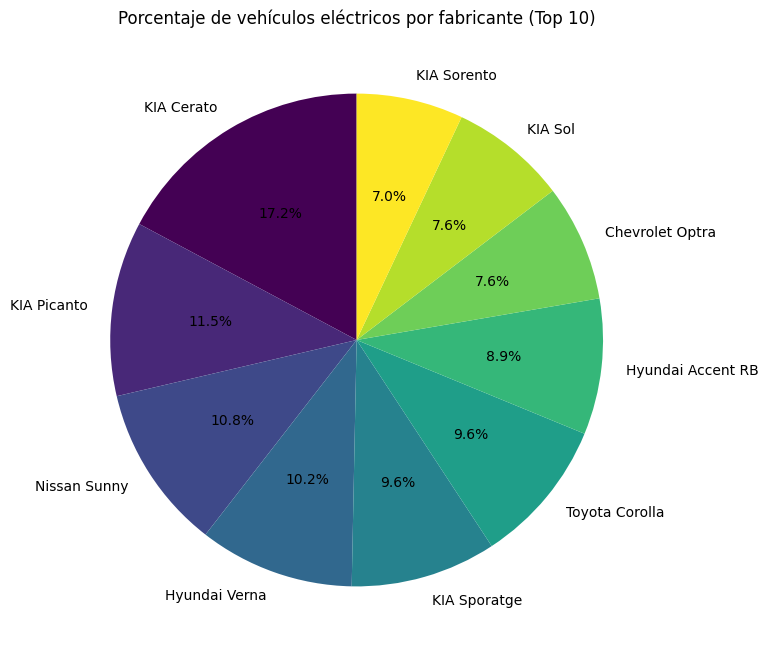

In [9]:
# Calcular porcentaje por fabricante
modelo_vehiculo = ds_vehiculos['Model'].value_counts().head(10)  # Solo los 10 principales fabricantes

# Crear gráfica de pastel
plt.figure(figsize = (8, 8))
modelo_vehiculo.plot.pie(autopct = '%1.1f%%', startangle = 90, cmap = 'viridis')
plt.title('Porcentaje de vehículos eléctricos por fabricante (Top 10)')
plt.ylabel('')
plt.show()


### 4. Gráfica de líneas: Evolución del número de vehículos por año del modelo (los primeros 30 vehículos)

Descripción: visualizar cómo ha cambiado la cantidad de vehículos registrados a lo largo de los años a traves del año del modelo.

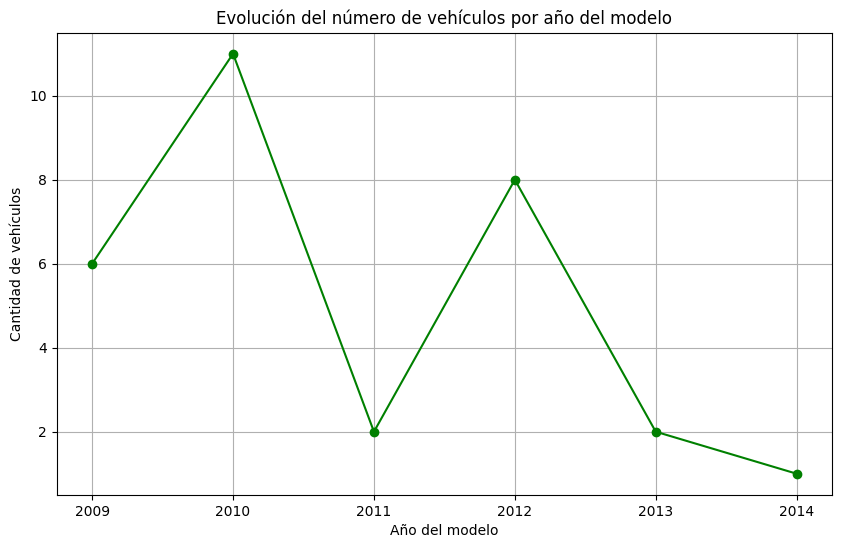

In [10]:
# Contar vehículos por año del modelo
año_vehiculo = ds_vehiculos['Year'].head(30).value_counts().sort_index()  # Solo los primeros 30 vehiculos para obtener un buen resultado

# Crear gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(año_vehiculo.index, año_vehiculo.values, marker = 'o', color = 'green')
plt.title('Evolución del número de vehículos por año del modelo')
plt.xlabel('Año del modelo')
plt.ylabel('Cantidad de vehículos')
plt.grid()
plt.show()


### 5. Gráfica de barras: Top 20 modelos más comunes

Descripción: mostrar la cantidad de modelos e identificar cuál es el más usado o es común.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6684\401431505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = modelos_top.values, y = modelos_top.index, palette = 'muted')


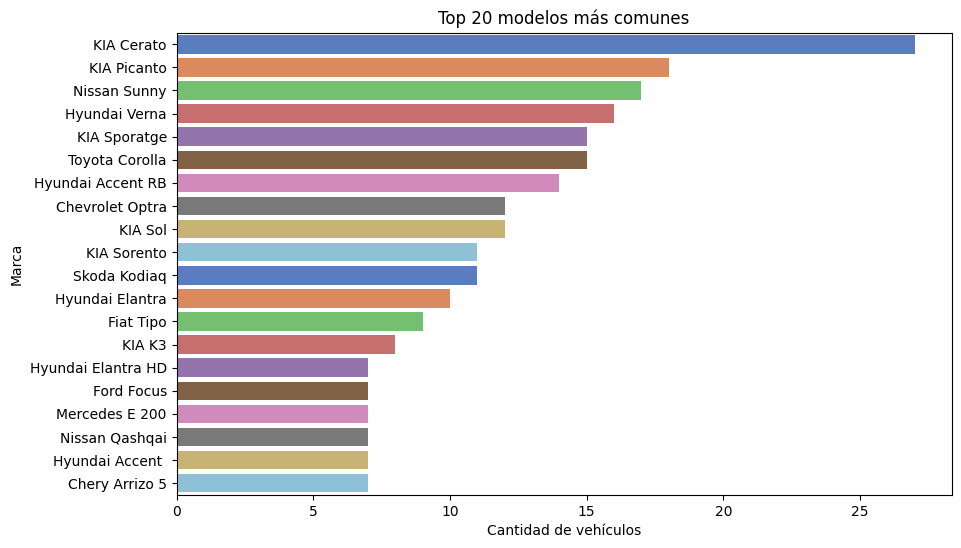

In [11]:
# Contar vehículos por modelo
modelos_top = ds_vehiculos['Model'].value_counts().head(20)

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x = modelos_top.values, y = modelos_top.index, palette = 'muted')
plt.title('Top 20 modelos más comunes')
plt.xlabel('Cantidad de vehículos')
plt.ylabel('Marca')
plt.show()


### 5. Análisis de Clustering con K-Means

In [12]:
# Estas líneas configuran variables de entorno que controlan el número de hilos (threads) que las bibliotecas subyacentes utilizan para cálculos paralelos en Python.
# Para esta ocasión, nos ayudarán a crear un entorno preparado para llevar a cabo correctamente el proceso del algoritmo K-means.
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

In [13]:
# Variable bidimensional
variable_bi_vehiculo = ds_vehiculos[['Kmh', 'Price']].values 

In [14]:
# Escalar la variable bidimensional
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(variable_bi_vehiculo)

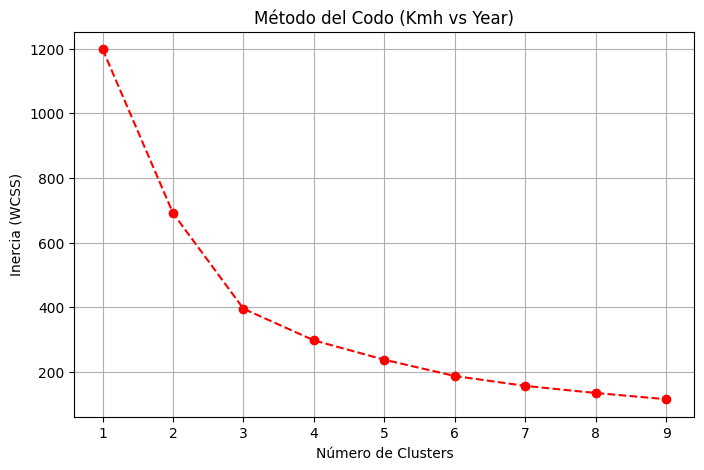

In [40]:
#Aplicar el método del codo para obtener los clusters ideales para el K-means
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(datos_escalados)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--', color='r')
plt.title('Método del Codo (Kmh vs Year)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (WCSS)')
plt.grid(True)
plt.show()

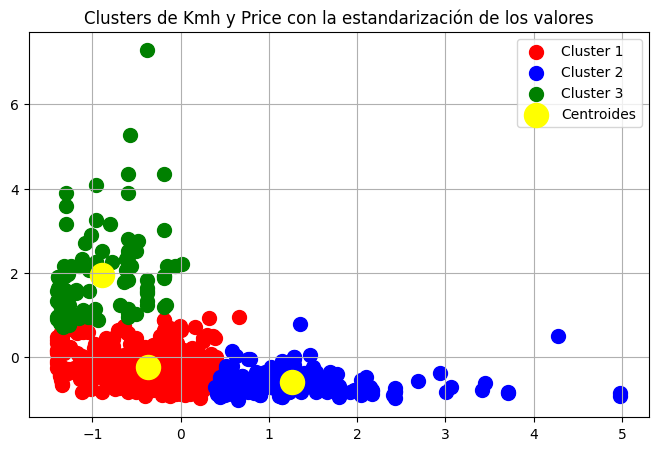

In [44]:
# Declarar el número del clusters y predecir la variable escalada.
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

clusters_kmeans = kmeans.fit_predict(datos_escalados)

# Graficar los puntos, coloreados según el cluster asignado
plt.figure(figsize=(8, 5))

# Colores para cada cluster
plt.scatter(datos_escalados[clusters_kmeans == 0, 0], datos_escalados[clusters_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(datos_escalados[clusters_kmeans == 1, 0], datos_escalados[clusters_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(datos_escalados[clusters_kmeans == 2, 0], datos_escalados[clusters_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Graficar los centroides de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroides')

#Mostrar resultados
plt.title('Clusters de Kmh y Price con la estandarización de los valores')
plt.legend()
plt.grid(True)
plt.show()

### PCA 

In [17]:
# Crear una instancia para 2 componentes principales
pca = PCA(n_components=2)
# Ajustar el modelo PCA a datos escalados y transformar en espacio de 2 dimensiones
pca_components = pca.fit_transform(datos_escalados)

In [18]:
#Varianza explicada: porcentaje individual del componente
var_explicada = pca.explained_variance_ratio_

In [19]:
#Varianza acumulada: suma del porcentaje del componente actual más los porcentajes de los componentes anteriores
var_acumulada = var_explicada.cumsum()

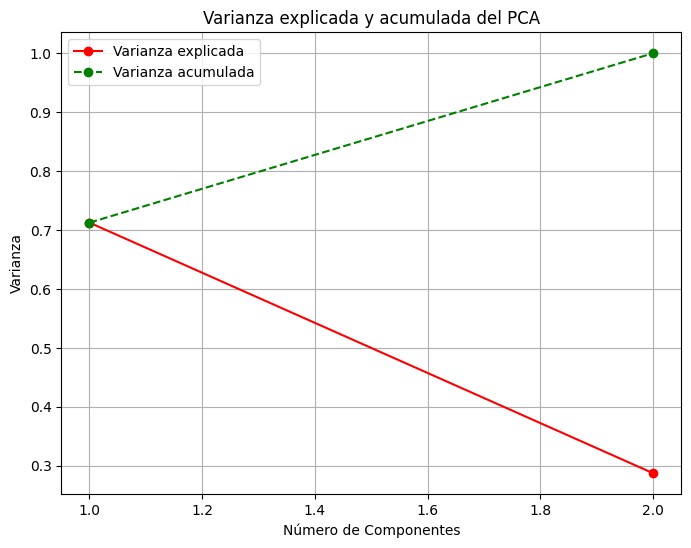

In [20]:
# Gráfico de líneas
plt.figure(figsize=(8, 6))

# Línea de varianza explicada
plt.plot(range(1, len(var_explicada) + 1), var_explicada, marker = 'o', color = 'r', label = 'Varianza explicada')

# Línea de varianza acumulada
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker = 'o', linestyle = '--', color = 'g', label = 'Varianza acumulada')

# Personalización del gráfico
plt.title('Varianza explicada y acumulada del PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()

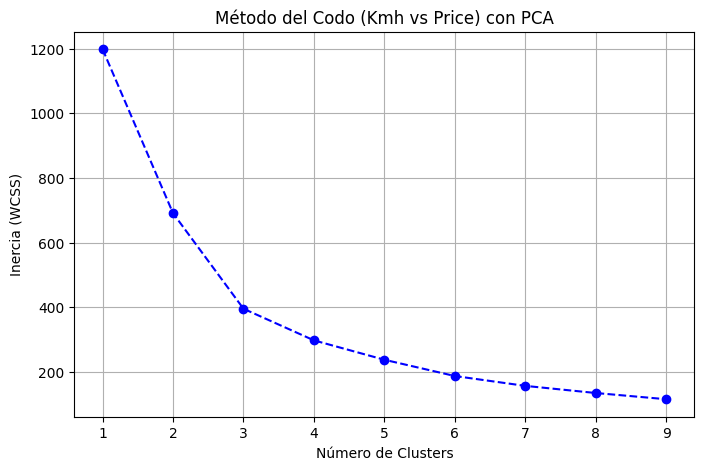

In [45]:
# Calcular WCSS para diferentes valores de k utilizando el método del codo y los datos transformados por PCA
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42, n_init = 10)
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)

# Graficar el resultado del método del codo para determinar el número óptimo de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--', color='b')
plt.title('Método del Codo (Kmh vs Price) con PCA')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (WCSS)')
plt.grid(True)
plt.show()

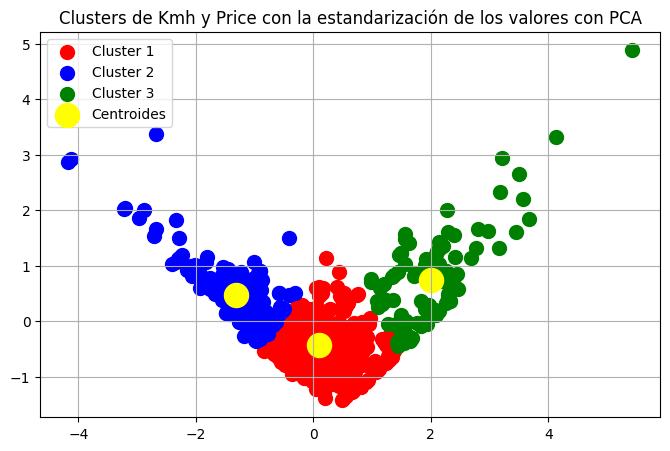

In [46]:
# Aplicar K-means con 3 clusters sobre los datos transformados por PCA
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, n_init = 10)


clusters_kmeans = kmeans.fit_predict(pca_components)

# Graficar los puntos, coloreados según el cluster asignado
plt.figure(figsize=(8, 5))

# Colores para cada cluster
plt.scatter(pca_components[clusters_kmeans == 0, 0], pca_components[clusters_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_components[clusters_kmeans == 1, 0], pca_components[clusters_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_components[clusters_kmeans == 2, 0], pca_components[clusters_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Graficar los centroides de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
# Configuración del gráfico
plt.title('Clusters de Kmh y Price con la estandarización de los valores con PCA')
plt.legend()
plt.grid(True)
plt.show()

### 6. Regresión Lineal Simple (RLS)

In [23]:
# columna 'Price' como variable independiente (vInd)
vInd = ds_vehiculos['Price'].values.reshape(-1,1) # El -1 es la cantidad n de filas y no de columnas. El 1 dice que es solmanete una sola columna
# -1 indica que se calcula automáticamente el número de filas según la longitud de datos.
# columna 'Kmh' como variable dependiente (vDep)
vDep = ds_vehiculos['Kmh'].values

In [24]:
# Dividir los datos en entrenamiento (80%) y prueba (20%) de forma reproducible usando random_state=42.
vInd_entrenamiento, vInd_pruebas, vDep_entrenamiento, vDep_pruebas = train_test_split(vInd, vDep, test_size=0.2, random_state=42)

In [25]:
# Creacion y ajuste del modelo de regresión lineal con los datos de entrenamiento.
modelo = LinearRegression()
modelo.fit(vInd_entrenamiento, vDep_entrenamiento)

LinearRegression()

In [26]:
# Obtener la pendiente y la intersección del modelo ajustado.
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_
# Imprimir los valores de la pendiente y la intersección.
print(f"Pendiente (M): {pendiente}")
print(f"Interseccion (B): {interseccion}")

Pendiente (M): -0.03111666913471781
Interseccion (B): 149331.1407594358


In [27]:
# Calcular la predicción (entrenamiento)
prediccion_entrenamiento = modelo.predict(vInd_entrenamiento)

In [28]:
# Calcular la predicción (pruebas)
prediccion_pruebas = modelo.predict(vInd_pruebas)

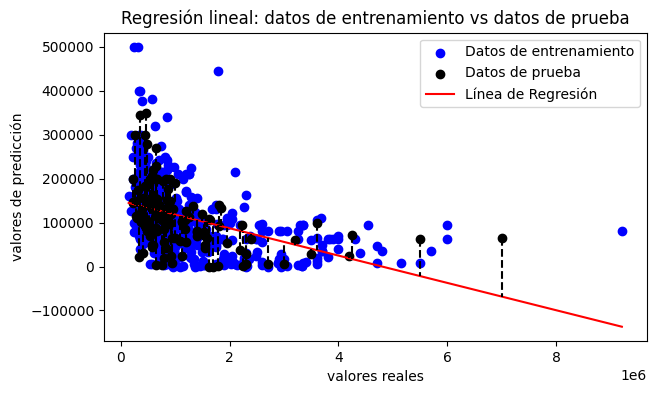

R2 en datos de pruebas: 0.16142334014471948


In [48]:
plt.figure(figsize=(7,4))
#VALORES DE ENTRENAMIENTO
plt.scatter(vInd_entrenamiento, vDep_entrenamiento, label='Datos de entrenamiento', color='blue')
plt.scatter(vInd_pruebas, vDep_pruebas, label='Datos de prueba', color='black')

#GRAFICAR LINEA DE REGRESIÓN LINEAL SIMPLE
linea_2 = np.linspace(min(vInd), max(vInd)).reshape(-1,1)
linea_prediccion_2 = modelo.predict(linea_2)
plt.plot(linea_2, linea_prediccion_2, label='Línea de Regresión', color = 'Red')

for i in range(len(vInd_pruebas)):
    plt.plot([vInd_pruebas[i], vInd_pruebas[i]], [vDep_pruebas[i],prediccion_pruebas[i]], color='black', linestyle = '--')

plt.xlabel('valores reales')
plt.ylabel('valores de predicción')
plt.title('Regresión lineal: datos de entrenamiento vs datos de prueba')
plt.legend()
plt.show()

# R2 - COEFICIENTE DE DETERMINACIÓN
r2_pruebas = r2_score(vDep_pruebas, prediccion_pruebas)
print(f"R2 en datos de pruebas: {r2_pruebas}")

### 7. Regresión Lineal Múltiple (RLM)

In [30]:
# Definir la variable dependiente (Kmh) y las variables independientes (Year y Price) para el modelo.
vDep_m = ds_vehiculos['Kmh']

vInd_m = ds_vehiculos[["Year", "Price"]]

In [31]:
# Dividir las variables independientes en conjuntos de entrenamiento y prueba de forma reproducible.
vInd_entrenamiento_m, vInd_pruebas_m = train_test_split(vInd_m, test_size=0.2, random_state=42)

In [32]:
# Dividir la variable dependiente en conjuntos de entrenamiento (80%) y prueba (20%) de forma reproducible.
vDep_entrenamiento_m, vDep_pruebas_m = train_test_split(vDep_m, test_size=0.2, random_state=42)

In [33]:
# Escalar las variables independientes: ajustar con el conjunto de entrenamiento y transformar ambos conjuntos.
scaler_m = StandardScaler()
data_scaler_1_m = scaler_m.fit_transform(vInd_entrenamiento_m)
data_scaler_2_m = scaler_m.transform(vInd_pruebas_m)

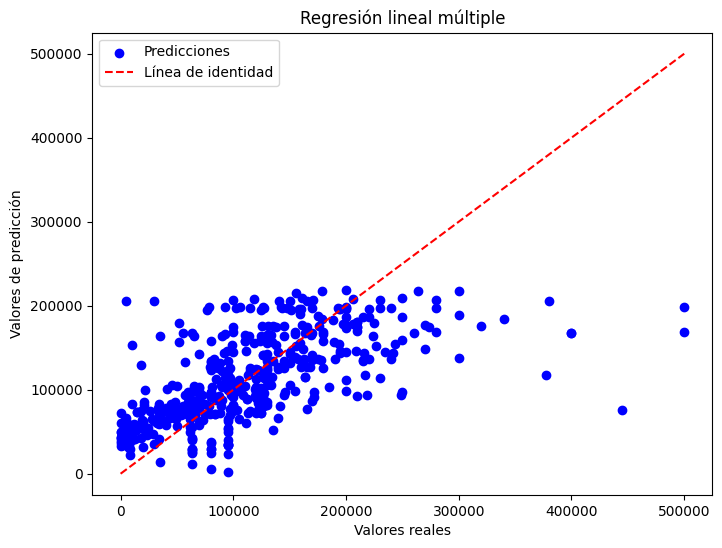

Coeficiente de determinación R2: 0.3894079497942192


In [34]:
# APLICAR MODELO DE REGRESIÓN LINEAL
modelo_m = LinearRegression()
modelo_m.fit(data_scaler_1_m, vDep_entrenamiento_m)

# Generar predicciones con el modelo correcto
predicciones_rlm_entrenamiento = modelo_m.predict(data_scaler_1_m)
predicciones_rlm_pruebas = modelo_m.predict(data_scaler_2_m)

# Crear la gráfica de dispersión con las predicciones
plt.figure(figsize=(8, 6))
plt.scatter(vDep_entrenamiento_m, predicciones_rlm_entrenamiento, color="blue", label="Predicciones")

# Línea de identidad
plt.plot(
    [vDep_m.min(), vDep_m.max()],
    [vDep_m.min(), vDep_m.max()],
    "r--",
    label="Línea de identidad"
)

plt.xlabel("Valores reales")
plt.ylabel("Valores de predicción")
plt.title("Regresión lineal múltiple")
plt.legend()
plt.show()

# Evaluar R2

r2_rlm = r2_score(vDep_pruebas_m, predicciones_rlm_pruebas)
print("Coeficiente de determinación R2:", r2_rlm)


### 8. Modelos de Regresión Lineal (Ridge, Lasso y ElasticNet)

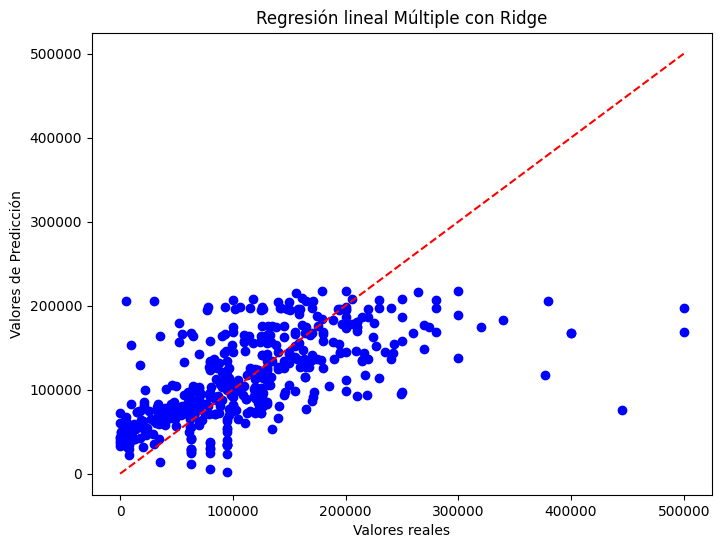

Coeficiente de determinación R2: 0.3897283824438432


In [ ]:
# APLICAR MODELO DE RIDGE

modelo_ridge = Ridge(alpha= 1.0)
modelo_ridge.fit(data_scaler_1_m, vDep_entrenamiento)

# Generar predicciones con el modelo Ridge para los conjuntos de entrenamiento y prueba.
predicciones_ridge_entrenamiento = modelo_ridge.predict(data_scaler_1_m)
predicciones_ridge_pruebas = modelo_ridge.predict(data_scaler_2_m)
# Graficar las predicciones del modelo Ridge frente a los valores reales en el conjunto de entrenamiento.
plt.figure(figsize=(8,6))
plt.scatter(vDep_entrenamiento, predicciones_ridge_entrenamiento, color="blue")

#LINEA DE INDENTIDAD: para comparar valores reales y predicciones
plt.plot(
    [
        vDep.min(),
        vDep.max()
    ],
    [
        vDep.min(),
        vDep.max()
    ],
    "r--"
)
# Configuración del gráfico
plt.xlabel("Valores reales")
plt.ylabel("Valores de Predicción")
plt.title("Regresión lineal Múltiple con Ridge")
plt.show()

# EVALUAR COEFICIENTE DETERMIANCION R2 EN EL CONJUNTO DE PRUEBA
r2_ridge = r2_score(vDep_pruebas, modelo_ridge.predict(data_scaler_2_m))
print("Coeficiente de determinación R2:", r2_ridge)

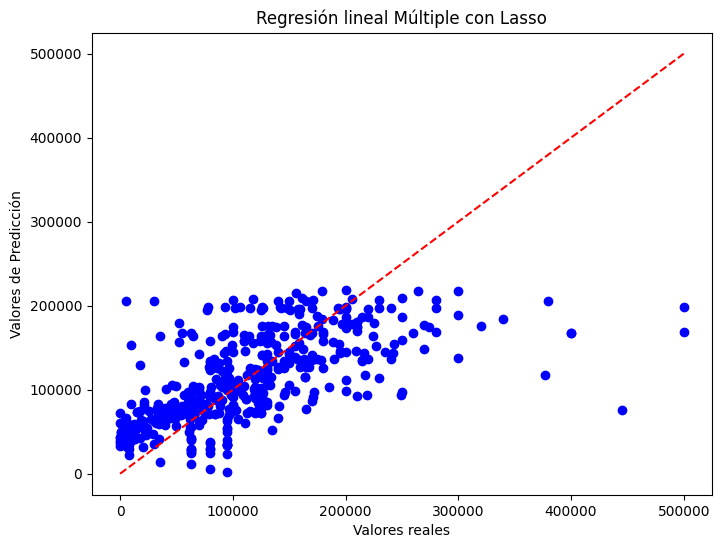

Coeficiente de determinación R2: 0.3894077653605308


In [36]:
# APLICAR MODELO DE REGRESION LASSO CON REGULARIZACION Y AJUSTE DE DATOS DE ENTRENAMIENTO ESCALADOS
modelo_lasso = Lasso(alpha= 0.1)
modelo_lasso.fit(data_scaler_1_m, vDep_entrenamiento)

# Predicciones con el modelo Lasso para los conjuntos de entrenamiento y prueba
predicciones_lasso_entrenamiento = modelo_lasso.predict(data_scaler_1_m)
predicciones_lasso_pruebas = modelo_lasso.predict(data_scaler_2_m)

#Graficar las predicciones del modelo Lasso frente a los valores reales en el conjunto de entrenamiento
plt.figure(figsize=(8,6))
plt.scatter(vDep_entrenamiento, predicciones_lasso_entrenamiento, color="blue")

#LINEA DE INDENTIDAD: comparar valores reales y predicciones
plt.plot(
    [
        vDep.min(),
        vDep.max()
    ],
    [
        vDep.min(),
        vDep.max()
    ],
    "r--"
)
# Configuración del gráfico
plt.xlabel("Valores reales")
plt.ylabel("Valores de Predicción")
plt.title("Regresión lineal Múltiple con Lasso")
plt.show()

# EVALUAR COEFICIENTE DE DETERMINACION r2 EN EL CONJUNTO DE PRUEBA
r2_lasso = r2_score(vDep_pruebas, modelo_lasso.predict(data_scaler_2_m))
print("Coeficiente de determinación R2:", r2_lasso)

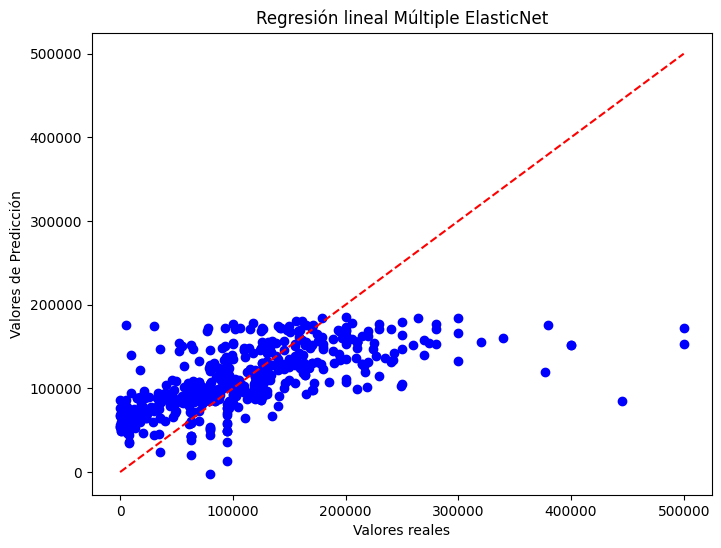

Coeficiente de determinación R2: 0.3902062160139126


In [37]:
# APLICAR MODELO DE REGRESION ELASTICNET CON REGULARIZACION COMBIANDA(L1 Y L2) 
modelo_elasticNet = ElasticNet(alpha= 1.0, l1_ratio= 0.5)
modelo_elasticNet.fit(data_scaler_1_m, vDep_entrenamiento)

# Predicciones con el modelo ElasticNet para los conjuntos de entrenamiento y prueba
predicciones_en_entrenamiento = modelo_elasticNet.predict(data_scaler_1_m)
predicciones_en_pruebas = modelo_elasticNet.predict(data_scaler_2_m)

# Gráfico de las predicciones del modelo ElasticNet frente a los valores reales en el conjunto de entrenamiento
plt.figure(figsize=(8,6))
plt.scatter(vDep_entrenamiento, predicciones_en_entrenamiento, color="blue")

#LINEA DE INDENTIDAD:  comparar valores reales y predicciones
plt.plot(
    [
        vDep.min(),
        vDep.max()
    ],
    [
        vDep.min(),
        vDep.max()
    ],
    "r--"
)

# Configuración del gráfico
plt.xlabel("Valores reales")
plt.ylabel("Valores de Predicción")
plt.title("Regresión lineal Múltiple ElasticNet")
plt.show()

# EVALUAR COEFICIENTE DE DETERMINACION R2 EN EL CONJUNTO DE PRUEBA
r2_elasticNet = r2_score(vDep_pruebas, modelo_elasticNet.predict(data_scaler_2_m))
print("Coeficiente de determinación R2:", r2_elasticNet)

In [38]:
#Revisión de los coeficientes(pendientes) y términos independientes(intersecciones) de los diferentes modelos ajustados.
modelo1 = modelo.coef_
modeloRidge = modelo_ridge.coef_
modeloLasso = modelo_lasso.coef_
modeloElastic = modelo_elasticNet.coef_

interseccion1 = modelo.intercept_
interseccionRidge = modelo_ridge.intercept_
interseccionLasso = modelo_lasso.intercept_
interseccionElastic = modelo_elasticNet.intercept_

# Imprimir los coeficientes y términos independientes para cada modelo
print("Revisión de coeficientes para el modelo de regresión lineal múltiple:")
print(modelo1)
print(interseccion1)
print("")

print("Revisión de coeficientes para el modelo de ridge:")
print(modeloRidge)
print(interseccionRidge)
print("")

print("Revisión de coeficientes para el modelo de lasso:")
print(modeloLasso)
print(interseccionLasso)
print("")

print("Revisión de coeficientes para el modelo de elasticNet:")
print(modeloElastic)
print(interseccionElastic)


Revisión de coeficientes para el modelo de regresión lineal múltiple:
[-0.03111667]
149331.1407594358

Revisión de coeficientes para el modelo de ridge:
[-46560.08607761  -9102.09021682]
109662.58455114915

Revisión de coeficientes para el modelo de lasso:
[-46682.91497704  -9054.73146136]
109662.58455114915

Revisión de coeficientes para el modelo de elasticNet:
[-30056.85280573 -12015.59572081]
109662.58455114882


In [39]:
# Evaluación métricas de rendimiento
mse_rlm = mean_squared_error(vDep_pruebas_m, predicciones_rlm_pruebas)
rmse_rlm = np.sqrt(mse_rlm)
mae_rlm = mean_absolute_error(vDep_pruebas, predicciones_rlm_pruebas)

#Imprimir valores
print("Error cuadrático medio:")
print(mse_rlm)
print("")

print("Raíz del error cuadrático medio:")
print(rmse_rlm)
print("")

print("Error absoluto:")
print(mae_rlm)

Error cuadrático medio:
3211320394.332565

Raíz del error cuadrático medio:
56668.51325323936

Error absoluto:
42529.73106052806
